<a href="https://colab.research.google.com/github/Bharath1Gowda13/SCT_DS_2/blob/main/TASK_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train = pd.read_csv("/content/titanic.csv")
test = pd.read_csv("/content/test.csv")

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
null_vals = train.isna().sum().sort_values(ascending=False)
print("Train:")
print(null_vals[null_vals > 0 ])

print("------")

null_vals = test.isna().sum().sort_values(ascending=False)
print("Test:")
print(null_vals[null_vals > 0 ])

Train:
Cabin       687
Age         177
Embarked      2
dtype: int64
------
Test:
Cabin    327
Age       86
Fare       1
dtype: int64


In [ ]:
ntrain = train.shape[0]
ntest = test.shape[0]

y_train = train['Survived'].values
test_IDs = test['PassengerId'].copy()

all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['Survived','PassengerId','Cabin', 'Ticket'], axis=1, inplace=True)
all_data

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
1304,3,"Spector, Mr. Woolf",male,NaN,0,0,8.0500,S
1305,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,108.9000,C
1306,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,7.2500,S
1307,3,"Ware, Mr. Frederick",male,NaN,0,0,8.0500,S


In [ ]:
null_vals = all_data.isna().sum().sort_values(ascending=False)
null_vals[null_vals > 0 ]


for col in null_vals[(null_vals < 10) & ( null_vals > 0)].index :
    all_data[col] = all_data.groupby(["Pclass","Sex"])[col].transform(
        lambda x: x.fillna(x.mode()[0]))
all_data.isna().sum().sort_values(ascending=False)

,0
Age,263
Pclass,0
Name,0
Sex,0
SibSp,0
Parch,0
Fare,0
Embarked,0


In [ ]:
all_data['FamilySize'] = all_data['SibSp'] + all_data['Parch'] + 1
all_data['IsAlone'] = all_data['FamilySize'] <= 1

In [ ]:
all_data['Title'] = all_data['Name'].apply(lambda x : x.split(' ')[1].strip('123,./!?'))
all_data.drop('Name', axis = 1 , inplace = True)

all_data['Title'] = all_data['Title'].apply(lambda x : x if x in ['Mr','Miss','Mrs','Master'] else 'NoTitle')
all_data['Title'].value_counts()

,count
Title,
Mr,736
Miss,256
Mrs,191
NoTitle,67
Master,59


In [ ]:
all_data['Age'] = all_data.groupby(['Pclass', 'Sex','Title']).Age.transform(lambda x: x.fillna(x.median()))
all_data["Age"].value_counts()

,count
Age,
26.00,165
18.00,86
30.00,55
24.00,47
42.00,45
...,...
60.50,1
11.50,1
0.33,1


In [ ]:
categorical_col = []
categorical_col = []
for col in all_data.columns:
    if all_data[col].dtype in [object, bool] and len(all_data[col].unique()) <= 50:
        if all_data[col].dtype in [object, bool] and len(all_data[col].unique()) <= 50:
            categorical_col.append(col)
categorical_col

['Sex', 'Embarked', 'IsAlone', 'Title']

In [ ]:
for col in categorical_col:
    all_data[col] = all_data[col].astype("category").cat.codes
all_data[categorical_col].head()

,Sex,Embarked,IsAlone,Title
0,1,2,0,2
1,0,0,0,3
2,0,2,1,1
3,0,2,0,3
4,1,2,1,2


In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(categories='auto')

array_hot_encoded = ohe.fit_transform(all_data[categorical_col]).toarray()

data_hot_encoded = pd.DataFrame(array_hot_encoded, index=all_data.index)

In [ ]:
data_other_cols = all_data.drop(columns=categorical_col)

all_data = pd.concat([data_hot_encoded, data_other_cols], axis=1)
all_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,Pclass,Age,SibSp,Parch,Fare,FamilySize
0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,3,22.0,1,0,7.2500,2
1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1,38.0,1,0,71.2833,2
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,3,26.0,0,0,7.9250,1
3,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1,35.0,1,0,53.1000,2
4,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,3,35.0,0,0,8.0500,1


In [ ]:
all_data.columns = all_data.columns.astype(str)

In [ ]:
train_data = all_data[:ntrain].copy()
test_data = all_data[ntrain:]

In [ ]:
train_data['Survived'] = y_train
train_data['Survived'] = train_data['Survived'].astype("category").cat.codes

train_data.head()


,0,1,2,3,4,5,6,7,8,9,10,11,Pclass,Age,SibSp,Parch,Fare,FamilySize,Survived
0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,3,22.0,1,0,7.2500,2,0
1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1,38.0,1,0,71.2833,2,1
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,3,26.0,0,0,7.9250,1,1
3,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1,35.0,1,0,53.1000,2,1
4,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,3,35.0,0,0,8.0500,1,0


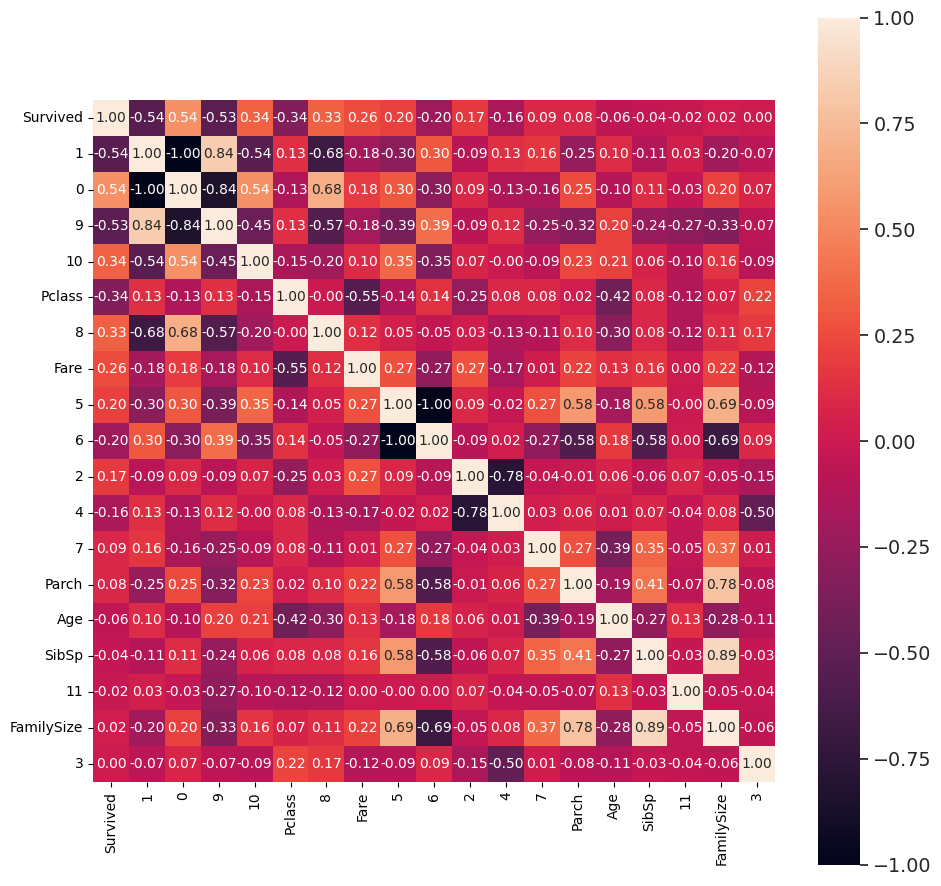

((891, 19), (418, 18))

In [ ]:
k = 40
f,ax = plt.subplots(figsize=(11, 11))
cols = train_data.corr().abs().nlargest(k, 'Survived')['Survived'].index
cm = np.corrcoef(train_data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

train_data = train_data[cols]
test_data = test_data[cols.drop('Survived')]
train_data.shape , test_data.shape

In [ ]:
from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor(contamination = 0.02)

outliers = clf.fit_predict(train_data)

train_data_cleaned = train_data[np.where(outliers == 1, True, False)]
train_data_cleaned.shape

(873, 19)

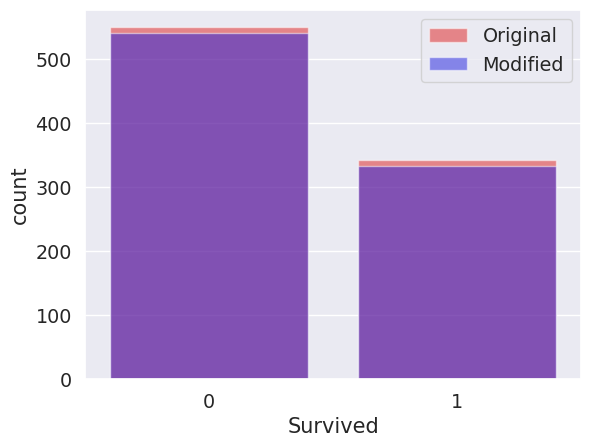

In [ ]:
sns.countplot(x = train_data['Survived'], label = "Original", color = 'red' , alpha = 0.5)
sns.countplot(x = train_data_cleaned['Survived'], label = "Modified" , color = 'blue',alpha = 0.5)
X_train = train_data_cleaned.drop('Survived', axis = 1)
y_train = train_data_cleaned.Survived

Survived
0    540
1    333
Name: count, dtype: int64
Survived
0    540
1    540
Name: count, dtype: int64


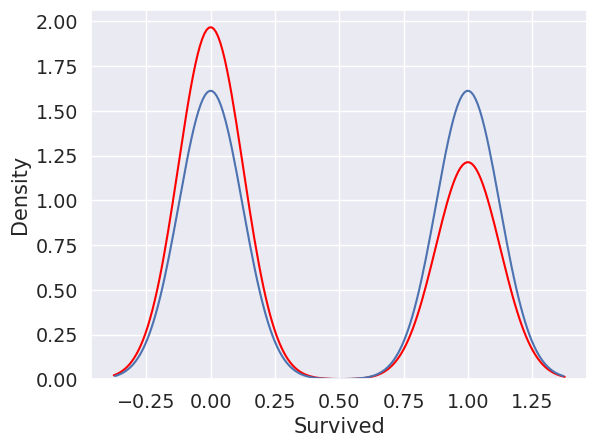

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE( random_state=42)

print(y_train.value_counts())
X_resampled, y_resampled = smote.fit_resample(X_train,y_train)
print(y_resampled.value_counts())

sns.kdeplot(y_train, label = "Original" , color = 'red')
sns.kdeplot(y_resampled, label = "Modified")
X_train = X_resampled
y_train = y_resampled

In [ ]:
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split, GridSearchCV, KFold, StratifiedKFold, RepeatedStratifiedKFold
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer, PowerTransformer
from sklearn.model_selection import GridSearchCV , cross_val_score

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
test_data_scaled = scaler.transform(test_data)

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.6 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier
pipeline_catB=Pipeline([ ('CatBoostClassifier',CatBoostClassifier(verbose = 0 ))])

cat = CatBoostClassifier(eval_metric='Accuracy',
                        verbose = 0)

#USING GRID SEARCH
params_catB = {
    'learning_rate' : [0.01,0.02,0.03,],
          'depth': [6,7,],
    'iterations' : [450,1000,]
         }

grid_search_cat = GridSearchCV(estimator=cat,verbose = 1, param_grid=params_catB, cv = 3,scoring='accuracy',n_jobs=-1).fit(X_train.values, y_train.values.ravel())
cat_best = grid_search_cat.best_estimator_
print('CatBoost Best Score',grid_search_cat.best_score_)
print('CatBoost Best Parmas',grid_search_cat.best_params_)
print('CatBoost Accuracy',cross_val_score(cat_best,X_train.values, y_train.values.ravel(), cv=3).mean())

Fitting 3 folds for each of 12 candidates, totalling 36 fits
CatBoost Best Score 0.8648148148148148
CatBoost Best Parmas {'depth': 6, 'iterations': 1000, 'learning_rate': 0.01}
CatBoost Accuracy 0.8648148148148148


In [ ]:
predictions = cat_best.predict(test_data.values)

In [ ]:
sub = pd.DataFrame()
sub['PassengerId'] = test_IDs
sub['Survived'] = predictions
sub['Survived'] = sub['Survived']
sub.to_csv('submission.csv',index=False)